# House Grade Prediction

### Reading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
%pwd

'd:\\ML\\house_grade_prediction\\research'

In [4]:
os.chdir("../")

In [5]:
%pwd

'd:\\ML\\house_grade_prediction'

In [6]:
df = pd.read_csv("./data/TRAINING_.csv")
df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


### EDA and preprocessing

In [7]:
df.shape

(7000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [9]:
df = df.drop(columns="id")

In [10]:
df.describe()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,7000.000000,6998.000000,6997.000000,6998.000000,6999.000000,5647.000000,6998.000000,7000.000000,6999.000000,7000.000000
mean,325.225571,7.012146,4.992568,4.004716,5.501357,47.202763,89.957988,4.509429,78.975711,3.494714
std,20.550583,1.420061,1.653418,1.596984,1.509129,48.806472,11.812719,1.831187,11.852443,1.700449
min,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,326.000000,7.000000,5.000000,4.000000,5.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,343.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


### Checking null values

In [11]:
df.isnull().sum()

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [12]:
df.roof.value_counts()

roof
no     1436
NO     1419
yes    1413
YES    1379
Name: count, dtype: int64

In [13]:
df["roof"] = df["roof"].replace({"NO":"no", "YES":"yes"})
df["roof"].value_counts()

roof
no     2855
yes    2792
Name: count, dtype: int64

- So as we can see there are 1353 null values in roof and roof(area) columns.
- For roof we will be filling nulls with "no" as we don't know that weather the house has a roof or not.

In [14]:
df[(df["roof"] != "no") & (df["roof"] != "yes")]

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
4,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
8,298,5.0,5.0,4.0,6.0,NaN,NaN,103.0,6,62.0,2,D,3357$
9,329,5.0,7.0,7.0,8.0,NaN,NaN,79.0,6,67.0,3,B,4073$
10,304,6.0,7.0,5.0,7.0,NaN,NaN,81.0,8,76.0,6,B,4413$
11,305,8.0,8.0,5.0,7.0,NaN,NaN,94.0,8,99.0,4,A,4917$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,294,6.0,4.0,2.0,4.0,NaN,NaN,96.0,4,97.0,1,D,3713$
6973,320,6.0,2.0,1.0,3.0,NaN,NaN,78.0,2,68.0,6,D,3496$
6983,312,6.0,3.0,3.0,5.0,NaN,NaN,87.0,5,84.0,6,D,3561$
6989,313,6.0,4.0,4.0,6.0,NaN,NaN,71.0,5,88.0,2,D,3550$


In [15]:
df[(df["roof"] != "no") & (df["roof"] != "yes")][["roof", "Roof(Area)"]].isnull().sum()

roof          1353
Roof(Area)    1353
dtype: int64

- So we can conclude:
    - That where roof value is missing the Roof(Area) value is also missing.

In [16]:
df[(df["roof"] == "no")][["roof", "Roof(Area)"]]

,roof,Roof(Area)
0,no,0.0
1,no,0.0
3,no,0.0
5,no,0.0
7,no,0.0
...,...,...
6986,no,0.0
6987,no,0.0
6988,no,0.0
6992,no,0.0


In [17]:
df[(df["roof"] == "no")][["Roof(Area)"]].sum()

Roof(Area)    0.0
dtype: float64

- From above findings we can conclude:
    - That when roof is "no" the are is 0.
    - So based on the above above finding we will fill null values in roof as "no" as we don't konw weather the house has roof or not.
    - And similarly for Roof(Area) we will fill nulls with 0.

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [19]:
df["roof"] = df["roof"].fillna("yes")
df["Roof(Area)"] = df["Roof(Area)"].fillna(df["Roof(Area)"].mean())

In [20]:
df.isnull().sum()[df.isnull().sum() > 0]

Troom          2
Nbedrooms      3
Nbwashrooms    2
Twashrooms     1
Lawn(Area)     2
API            1
dtype: int64

In [21]:
df["Troom"] = df["Troom"].fillna(9.0)
df["Nbedrooms"] = df["Nbedrooms"].fillna(6.0)
df["Nbwashrooms"] = df["Nbwashrooms"].fillna(3.0)
df["Twashrooms"] = df["Twashrooms"].fillna(4.0)
df["Lawn(Area)"] = df["Lawn(Area)"].fillna(df["Lawn(Area)"].mean())
df["API"] = df["API"].fillna(df["API"].mean())

In [22]:
df.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [23]:
df["EXPECTED"] = df["EXPECTED"].str.replace("$", "")
df["EXPECTED"] = df["EXPECTED"].apply(pd.to_numeric)

### EDA

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
color_palette = sns.color_palette("pastel")

In [25]:
df.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

In [26]:
cate_col = df.select_dtypes(include="object").columns
num_col = df.select_dtypes(exclude="object").columns
print("Numeric Columns: ")
print(num_col)
print("\n")
print("Categorical columns:")
print(cate_col)

Numeric Columns: 
Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED'],
      dtype='object')


Categorical columns:
Index(['roof', 'Grade'], dtype='object')


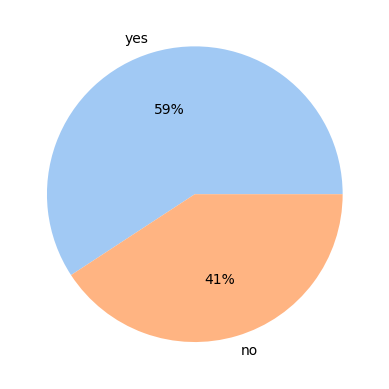

In [27]:
roof_pie = df["roof"].value_counts()
plt.pie(x=roof_pie.values, labels=roof_pie.index, autopct="%.0f%%", colors=color_palette)
plt.show()

- So as we can see that 60% for the house don't have roof.

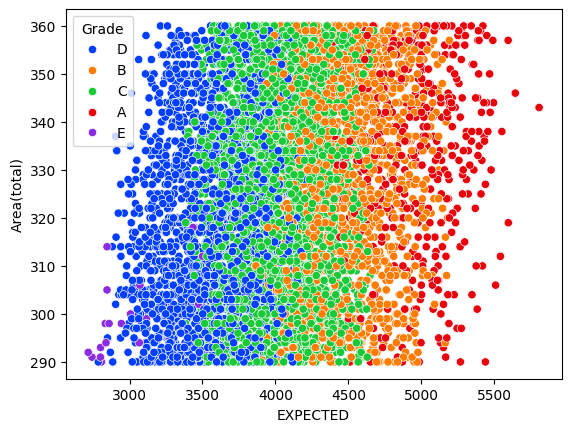

In [28]:
sns.scatterplot(data=df, x="EXPECTED", y="Area(total)", hue="Grade", palette="bright")
plt.show()

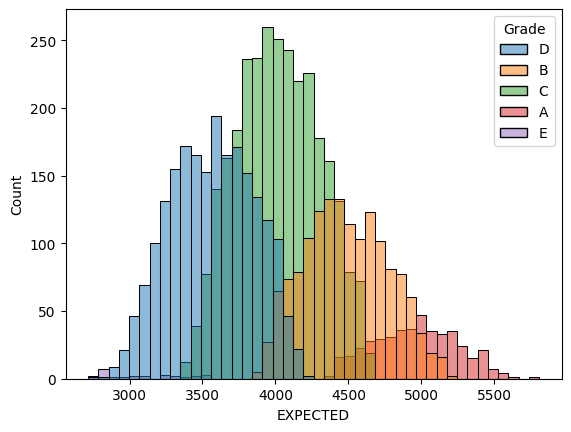

In [29]:
sns.histplot(data=df, x="EXPECTED", hue="Grade")
plt.show()

- So from above histogram we can conclude:
    - The price distribution is normal but a lot of people are expecting prices higher then their grade house forming a seperate distrobution.

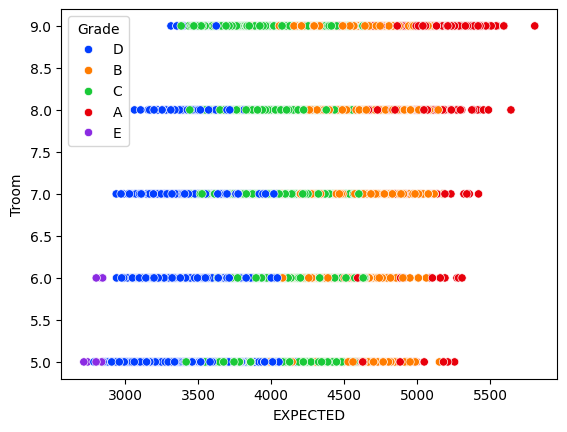

In [30]:
sns.scatterplot(data=df, x="EXPECTED", y="Troom", palette="bright", hue="Grade")
plt.show()

- So from that above graph we can see that most the people who are expecting higher price in D grade are people with 5, 6 and 7 room houses.

<Axes: xlabel='EXPECTED', ylabel='API'>

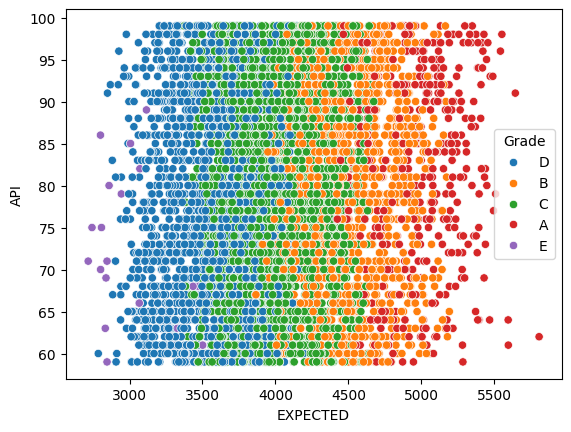

In [31]:
sns.scatterplot(data=df, x="EXPECTED", y="API", hue="Grade")

- So we can see there is no relation between expected price of the house and air purity index.

<Axes: xlabel='EXPECTED', ylabel='ANB'>

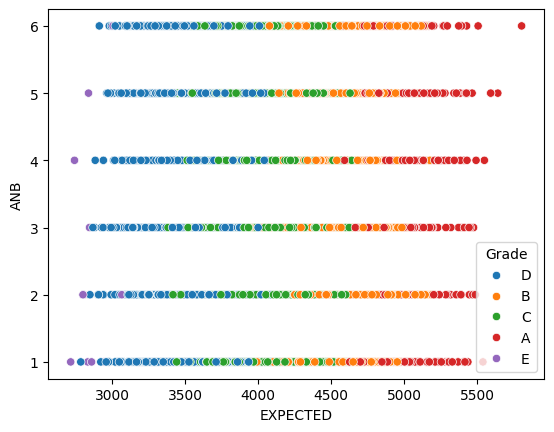

In [32]:
sns.scatterplot(data=df, x="EXPECTED", y="ANB", hue="Grade")

- So Amenities near by is also not a factor in price expectaion.

### Label Encoding

In [33]:
df = df.drop(columns=['ANB'])

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cate_col = ['Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'Nfloors', 'roof']
num_col = ['Roof(Area)', 'Area(total)', 'Lawn(Area)', 'API', 'EXPECTED']

transformer = FunctionTransformer(np.sqrt)

pipe1 = Pipeline(
    [
        ("OneHotEncoder", OneHotEncoder())
    ]
)

pipe2 = Pipeline(
    [
        ("Transformer", transformer)
    ]
)

preprocessor = ColumnTransformer(
    [
        ("Num_col", pipe2, num_col),
        ("cate_col", pipe1, cate_col)
    ]
)

In [53]:
combined_col = num_col + cate_col
combined_col

['Roof(Area)',
 'Area(total)',
 'Lawn(Area)',
 'API',
 'EXPECTED',
 'Troom',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'Nfloors',
 'roof']

In [54]:
X = preprocessor.fit_transform(df[combined_col])

In [55]:
preprocessor.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('Num_col',
                                 Pipeline(steps=[('Transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>))]),
                                 ['Roof(Area)', 'Area(total)', 'Lawn(Area)',
                                  'API', 'EXPECTED']),
                                ('cate_col',
                                 Pipeline(steps=[('OneHotEncoder',
                                                  OneHotEncoder())]),
                                 ['Troom', 'Nbedrooms', 'Nbwashrooms',
                                  'Twashrooms', 'Nfloors', 'roof'])])>

In [56]:
pre_df = pd.DataFrame.sparse.from_spmatrix(X)
pre_df = pd.concat([pre_df, df["Grade"]], axis=1)
pre_df["Grade"] = LabelEncoder().fit_transform(pre_df["Grade"])
pre_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Grade
0,0.000000,5.723585,4.343805,4.158883,8.249836,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1,0.000000,5.843544,4.430817,4.584967,8.402680,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,4.584967,5.686975,4.369448,4.488636,8.342840,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,0.000000,5.796058,4.521789,4.465908,8.149891,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
4,3.875416,5.690359,4.584967,4.543295,8.421563,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,3.875416,5.726848,4.369448,4.304065,8.220941,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
6996,4.615121,5.834811,4.290459,4.343805,8.113726,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
6997,4.430817,5.726848,4.394449,4.574711,8.250620,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
6998,0.000000,5.826000,4.564348,4.442651,8.409385,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [57]:
df['Grade'].value_counts()

Grade
C    2928
D    2129
B    1475
A     442
E      26
Name: count, dtype: int64

### Model Building

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [59]:
train, test = train_test_split(pre_df, test_size=0.2, random_state=42)
# Upsampling
df1 = train[(train["Grade"] == 4)]
df2 = train[(train["Grade"] == 0)]

train = pd.concat([train, df2, df2, df1, df1, df1, df1, df1, df1])
train["Grade"].value_counts()

Grade
2    2342
3    1710
1    1179
0    1044
4     147
Name: count, dtype: int64

In [60]:
X_train = train.drop(columns="Grade")
y_train = train["Grade"]
y_train.value_counts()

Grade
2    2342
3    1710
1    1179
0    1044
4     147
Name: count, dtype: int64

In [61]:
X_test = test.drop(columns="Grade")
y_test = test["Grade"]

In [62]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    # "KNeighborsClassifier": KNeighborsClassifier(),
    # "GaussianNB": GaussianNB(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    # "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier" : CatBoostClassifier()
}

In [63]:
params = {
    "LogisticRegression": {
        # {'penalty': 'l2', 'solver': 'newton-cg'}
        "penalty": ["l2"],
        "solver": ["newton-cg"],
    },
    "DecisionTreeClassifier": { 
        # {'min_samples_split': 2, 'max_depth': 25, 'criterion': 'entropy'}
        'criterion': ['entropy'],
        'max_depth': [22, 23, 24, 25],
        # "class_weight": ['balanced'],
        'min_samples_split': [6, 8, 10],
        # 'min_samples_leaf': [1, 2, 3],
        # 'max_features': ['sqrt', 'log2']
    },
    # "KNeighborsClassifier": {
    #     "weights": ["uniform", "distance"],
    #     "algorithm": ["ball_tree", "kd_tree", "brute"],
    # },
    # "GaussianNB": {
    #     'var_smoothing': [1e-9, 1e-8]    
    # },
    "RandomForestClassifier": {
        # {'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 24, 'criterion': 'entropy'}
        "n_estimators": [60, 70, 80, 90, 100],
        'criterion': ['entropy'],
        'max_depth': [22, 23, 24, 25],
        # 'min_samples_split': [8, 10],
        # 'min_samples_leaf': [1, 2, 3],
        # 'max_features': ['sqrt', 'log2']
    },
    "GradientBoostingClassifier": {
        "learning_rate": [0.1], 
        "random_state": [10]
    }, 
    # "AdaBoostClassifier": {
    #     "n_estimators": [10, 20, 30],
    #     "algorithm": ["SAMME", "SAMME.R"],
    #     "learning_rate": [0.1, 0.05, 0.01],
    # },
    "XGBClassifier": {
        # {'min_child_weight': 5, 'max_depth': 19, 'learning_rate': 0.5}
        'learning_rate': [0.5, .6, .7],
        'n_estimators': range(60, 160, 20),
        'max_depth': [19, 20, 21],
        # 'min_child_weight': [5],
        # 'gamma': [0, 0.1, 0.2],
        # 'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bytree': [0.6, 0.8, 1.0],
        # 'reg_alpha': [0, 0.1, 0.5],
        # 'reg_lambda': [1, 1.5, 2]
    },
    "CatBoostClassifier": {
        # "learning_rate": [0.05, 0.1, 0.2],
        # "max_depth": [10, 15, 20],
        # "l2_leaf_reg": [0.1, 1, 3],
        # "random_strength": [3, 5, 7],
        # "bagging_temperature": [0.1, 0.5, 1],
        # "border_count": [64, 128, 256],
        # "iterations": [50, 100, 200],
    },
}

In [64]:
def model_trainer(X_train, y_train, models: dict, params: dict = None):
    report = {}
    trained_model = {}
    best_params = {}
    for i in models.keys():
        m = models[i]
        p = params[i]

        if p != {}:
            rs = GridSearchCV(m, param_grid=p, cv=5, n_jobs=-1)
            rs.fit(X_train, y_train)
            m.set_params(**rs.best_params_)
            best_params[i] = rs.best_params_
        else:
            best_params[i] = {}

        m.fit(X_train, y_train)
        pred = m.predict(X_train)
        trained_model[i] = m
        report[i] = classification_report(y_train, pred, output_dict=True)

    return report, trained_model, best_params

In [65]:
def model_evaluation(X_test, y_test, t_models:dict):
    report = {}

    for i in t_models.keys():
        m = t_models[i]
        pred = m.predict(X_test)
        report[i] = classification_report(y_test, pred, output_dict=True)

    return report

In [66]:
train_report, trained_models, best_params = model_trainer(X_train, y_train, models, params)
# for i in train_report.keys():
#     print(5*">", i, 5*"<")
#     print(f"Best params: {best_params[i]}")
#     print(np.round(pd.DataFrame(train_report[i]), 3))
#     print(20*"-")

Learning rate set to 0.086999
0:	learn: 1.4686492	total: 151ms	remaining: 2m 30s
1:	learn: 1.3618980	total: 156ms	remaining: 1m 17s
2:	learn: 1.2770501	total: 161ms	remaining: 53.5s
3:	learn: 1.2089991	total: 166ms	remaining: 41.3s
4:	learn: 1.1399698	total: 171ms	remaining: 34s
5:	learn: 1.0823532	total: 177ms	remaining: 29.3s
6:	learn: 1.0307851	total: 182ms	remaining: 25.9s
7:	learn: 0.9880979	total: 187ms	remaining: 23.2s
8:	learn: 0.9495576	total: 192ms	remaining: 21.1s
9:	learn: 0.9135590	total: 197ms	remaining: 19.5s
10:	learn: 0.8819591	total: 202ms	remaining: 18.2s
11:	learn: 0.8519972	total: 208ms	remaining: 17.1s
12:	learn: 0.8232226	total: 213ms	remaining: 16.2s
13:	learn: 0.7977976	total: 218ms	remaining: 15.4s
14:	learn: 0.7745771	total: 224ms	remaining: 14.7s
15:	learn: 0.7524062	total: 229ms	remaining: 14.1s
16:	learn: 0.7321376	total: 235ms	remaining: 13.6s
17:	learn: 0.7145509	total: 242ms	remaining: 13.2s
18:	learn: 0.6986088	total: 248ms	remaining: 12.8s
19:	learn: 

In [67]:
test_report = model_evaluation(X_test, y_test, trained_models)
for i in test_report.keys():
    print(5*">", i, 5*"<")
    print(best_params[i])
    print(np.round(pd.DataFrame(test_report[i]), 3))
    print(20*"-")

>>>>> LogisticRegression <<<<<
{'penalty': 'l2', 'solver': 'newton-cg'}
                0        1        2        3      4  accuracy  macro avg  \
precision   0.863    0.882    0.886    0.922  0.200     0.889      0.751   
recall      0.872    0.834    0.915    0.902  0.400     0.889      0.785   
f1-score    0.868    0.858    0.900    0.912  0.267     0.889      0.761   
support    94.000  296.000  586.000  419.000  5.000     0.889   1400.000   

           weighted avg  
precision         0.892  
recall            0.889  
f1-score          0.890  
support        1400.000  
--------------------
>>>>> DecisionTreeClassifier <<<<<
{'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 6}
                0        1        2       3      4  accuracy  macro avg  \
precision   0.707    0.643    0.771    0.87  0.167     0.766      0.631   
recall      0.691    0.632    0.792    0.85  0.200     0.766      0.633   
f1-score    0.699    0.637    0.781    0.86  0.182     0.766      0.63

d:\ML\house_grade_prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML\house_grade_prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML\house_grade_prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
test_df = pd.read_csv("./data/TEST_.csv")
test_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [69]:
test_df = test_df.drop(columns="id")

In [70]:
test_df.isnull().sum()

Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
dtype: int64

In [71]:
test_df.shape

(3299, 12)

In [72]:
test_df["roof"] = test_df["roof"].replace({"NO":"no", "YES":"yes"})
test_df["roof"].value_counts()

roof
no     1340
yes    1306
Name: count, dtype: int64

In [73]:
test_df["roof"] = test_df["roof"].fillna("yes")
test_df["Roof(Area)"] = test_df["Roof(Area)"].fillna(test_df["Roof(Area)"].mean())

In [74]:
test_df.isnull().sum()

Area(total)    0
Troom          1
Nbedrooms      1
Nbwashrooms    1
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     1
Nfloors        0
API            1
ANB            0
EXPECTED       0
dtype: int64

In [75]:
test_df["Troom"] = test_df["Troom"].fillna(9.0)
test_df["Nbedrooms"] = test_df["Nbedrooms"].fillna(6.0)
test_df["Nbwashrooms"] = test_df["Nbwashrooms"].fillna(3.0)
test_df["Twashrooms"] = test_df["Twashrooms"].fillna(4.0)
test_df["Lawn(Area)"] = test_df["Lawn(Area)"].fillna(test_df["Lawn(Area)"].mean())
test_df["API"] = test_df["API"].fillna(test_df["API"].mean())

In [76]:
test_df.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [77]:
test_df["EXPECTED"] = test_df["EXPECTED"].str.replace("$", "")
test_df["EXPECTED"] = test_df["EXPECTED"].apply(pd.to_numeric)

In [78]:
test_df = test_df.drop(columns=['ANB'])

In [79]:
cate_col = ['Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'Nfloors', 'roof']
num_col = ['Roof(Area)', 'Area(total)', 'Lawn(Area)', 'API', 'EXPECTED']

X = preprocessor.transform(test_df[combined_col])

test_pre_df = pd.DataFrame.sparse.from_spmatrix(X)
test_pre_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,3.876752,5.855072,4.442651,4.521789,8.394573,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,5.743003,4.465908,4.430817,8.141190,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4.795791,5.837730,4.454347,4.564348,8.310661,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.876752,5.799093,4.663439,4.584967,8.371705,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,5.730100,4.343805,4.174387,8.016978,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3.876752,5.857933,4.615121,4.499810,8.258163,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3295,0.000000,5.826000,4.477337,4.330733,8.220134,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3296,4.488636,5.730100,4.488636,4.430817,8.249314,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3297,4.488636,5.866468,4.615121,4.605170,8.170186,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
model = trained_models["LogisticRegression"]
pred = model.predict(test_pre_df)

In [81]:
submission = pd.read_csv("./data/SAMPLE_.csv")
submission.head()

,id,Grade
0,1,C
1,2,B
2,3,E
3,4,E
4,5,B


In [82]:
submission['Grade'] = pred

In [83]:
submission.rename(columns={"Grade":"grade"}, inplace=True)

In [84]:
submission['grade'].unique()

array([1, 2, 3, 0, 4])

In [85]:
submission["grade"].replace({1:"B", 3:"D", 2:"C", 0:"A", 4:"E"}, inplace=True)

In [86]:
submission.to_csv("./data/submission.csv", index=False)